In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\surya\Downloads\my_movies.csv")

In [4]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [8]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [9]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [10]:
te = TransactionEncoder()

In [11]:
te_ary = te.fit(df1).transform(df1)

In [12]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

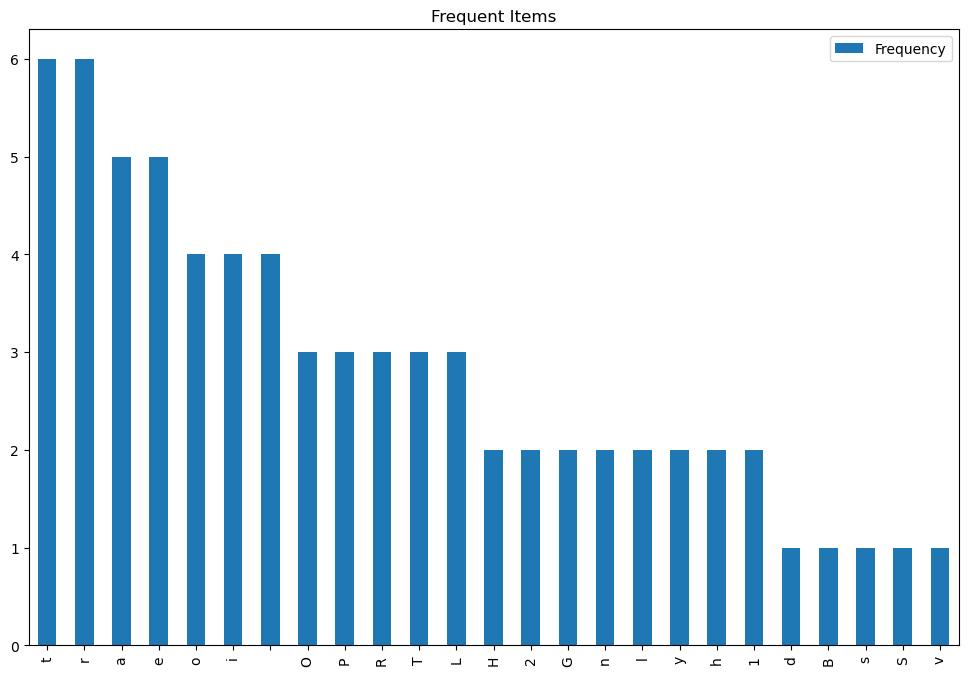

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',figsize=(12,8),title="Frequent Items")
plt.show()

In [14]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [15]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [18]:
confs = []
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)
all_conf = pd.concat(confs,axis=1)
all_conf

,Support: 0.005,Support: 0.001,Support: 0.003,Support: 0.007
0.1,250,250,250,250
0.2,220,220,220,220
0.3,217,217,217,217
0.4,216,216,216,216
0.5,216,216,216,216
0.6,134,134,134,134
0.7,129,129,129,129
0.8,128,128,128,128
0.9,125,125,125,125


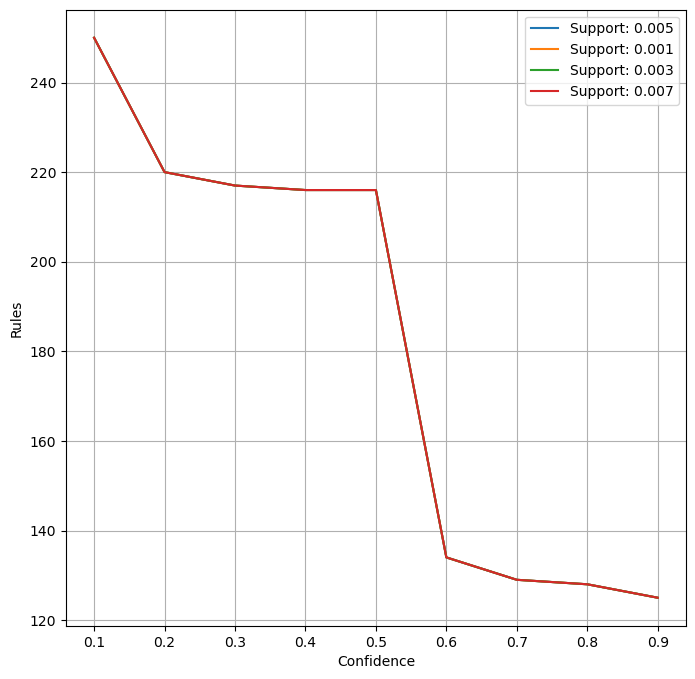

In [17]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [19]:
ap_final =  apriori(ap,0.005,True)

In [20]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [21]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8,0.571429
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf,0.833333
...,...,...,...,...,...,...,...,...,...,...
113720,"(P, 2)","(r, H, y, t, , o, e, a)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113721,"(2, e)","(r, H, y, t, P, , a, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113723,"(2, )","(r, H, y, t, P, o, e, a)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113726,"(2, a)","(r, H, y, t, P, , e, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [22]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

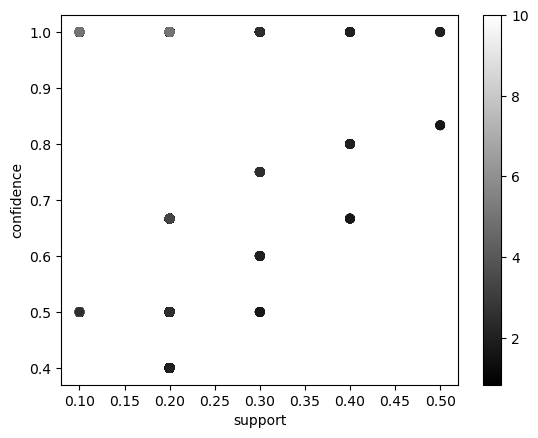

In [24]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")
plt.show()

Even it have positive correlation but not strongly.